In [2]:
import numpy as np
import pandas as pd
import calendar
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max.columns', 20)
pd.set_option('display.max.rows', 1000)
pd.set_option("display.float_format", lambda x: "%.2f" % x )

### Load Dataset

In [4]:
try:
    df = pd.read_csv('dataset.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('dataset.csv', encoding='latin-1')
    except UnicodeDecodeError:
        df = pd.read_csv('dataset.csv', encoding='cp1252')

In [5]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Penicillin,Abnormal


#### Staging Dataframe

In [92]:
df1 = df.copy()

In [93]:
df1.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Penicillin,Abnormal


### Custom Functions And Variable

In [10]:
#Color Palette
color_palette_50 =  [
    'red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan',
    'gold', 'teal', 'navy', 'magenta', 'lime', 'coral', 'indigo', 'salmon', 'maroon', 'turquoise',
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99',
    '#e31a1c', '#fdbf6f', '#ff9896', '#c5b0d5', '#c49c94',
    '#9edae5', '#f7b6d2', '#dbdb8d', '#aec7e8', '#ffbb78',
    '#98df8a', '#ff6347', '#40e0d0', '#da70d6', '#87ceeb'
]

In [12]:
#Custom function to detect outliers in a colum
def detectOutliers(dfr, column_name):
    q1 = dfr[column_name].quantile(0.25)
    q3 = dfr[column_name].quantile(0.75)
    
    #interquantile range
    iqr = q3 - q1
    lowerBound = q1 - 1.5 * iqr
    upperBound = q3 + 1.5 * iqr
    
    #outilier
    outliers = dfr[(dfr[column_name] < lowerBound) | (dfr[column_name] > upperBound)]
    return outliers

In [165]:
#This function take a dimension and measure from a dataframe
# It returns count, min, max, avg and sum

def dimMeasAnalysis(dfr, dim, meas, cols = ['count', 'min', 'max', 'avg', 'sum']):
    i = 0
    for x in cols:
        
        if (x == "count"):
            df_DimMeasCount = pd.DataFrame(dfr.groupby(dim, observed = False)[meas].count().reset_index())
            if (i == 0) :
               df_DimMeas = df_DimMeasCount
            else:
                df_DimMeas = df_DimMeas.merge(df_DimMeasCount, on = dim)
            df_DimMeas = df_DimMeas.rename(columns = {
                meas : meas+"_Count"
            }) 
        if (x == "min"):
            df_DimMeasMin = pd.DataFrame(dfr.groupby(dim, observed = False)[meas].min().reset_index())
            if (i == 0) :
               df_DimMeas = df_DimMeasMin
            else:
                df_DimMeas = df_DimMeas.merge(df_DimMeasMin, on = dim)
            df_DimMeas = df_DimMeas.rename(columns = {
                meas : meas+"_Min"
            })
        elif (x == "max"):
            df_DimMeasMax = pd.DataFrame(dfr.groupby(dim, observed = False)[meas].max().reset_index())
            if (i == 0) :
               df_DimMeas = df_DimMeasMax
            else:
                df_DimMeas = df_DimMeas.merge(df_DimMeasMax, on = dim)
            df_DimMeas = df_DimMeas.rename(columns = {
                meas : meas+"_Max"
            })
        elif (x == "avg"):
            df_DimMeasMean = pd.DataFrame(dfr.groupby(dim, observed = False)[meas].mean().reset_index())
            if (i == 0) :
               df_DimMeas = df_DimMeasMean
            else:
                df_DimMeas = df_DimMeas.merge(df_DimMeasMean, on = dim )
            df_DimMeas = df_DimMeas.rename(columns = {
                meas : meas+"_Avg"
            })
        elif (x == "sum"):
            df_DimMeasSum = pd.DataFrame(dfr.groupby(dim, observed = False)[meas].sum().reset_index())
            if (i == 0) :
               df_DimMeas = df_DimMeasSum
            else:
                df_DimMeas = df_DimMeas.merge(df_DimMeasSum, on = dim )
            df_DimMeas = df_DimMeas.rename(columns = {
                meas : meas+"_Total"
            })
        i += 1
   
         
    return df_DimMeas

## Overview

In [94]:
df1.head(1)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal


In [95]:
df1.shape

(55500, 15)

In [96]:
df1.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [97]:
#Columns
df1.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

## Data Cleaning And Standardization

In [98]:
df1.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Penicillin,Abnormal


### Cleaning Columns

In [99]:
# Converting Column names to Title_Snake_Case
df1.columns = df1.columns.str.replace(" ", "_")

In [100]:
#Standardize the Name column to title case
df1['Name'] = df1['Name'].str.title()
df1.head(3)

,Name,Age,Gender,Blood_Type,Medical_Condition,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal


### Standardizing the date columns

In [101]:
#Date_of_Admission
df1['Date_of_Admission'] = pd.to_datetime(df1['Date_of_Admission'])
df1['Date_of_Admission'] = df1['Date_of_Admission'].astype('datetime64[ns]')

#Discharge_Date
df1['Discharge_Date'] = pd.to_datetime(df1['Discharge_Date'])
df1['Discharge_Date'] = df1['Discharge_Date'].astype('datetime64[ns]')

df1.dtypes

Name                          object
Age                            int64
Gender                        object
Blood_Type                    object
Medical_Condition             object
Date_of_Admission     datetime64[ns]
Doctor                        object
Hospital                      object
Insurance_Provider            object
Billing_Amount               float64
Room_Number                    int64
Admission_Type                object
Discharge_Date        datetime64[ns]
Medication                    object
Test_Results                  object
dtype: object

### Handle Duplicated Record

In [103]:
df1.duplicated().sum()

534

In [104]:
# df1 = With duplicate
# df1_duplicated = duplicate
# df2 = without duplicate
df1_duplicated = df1[df1.duplicated()]
df2 = df1[~df1.duplicated()]
df2.head()

,Name,Age,Gender,Blood_Type,Medical_Condition,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Penicillin,Abnormal


In [105]:
df2.shape

(54966, 15)

### Detect Outliers

In [106]:
detectOutliers(df2, "Age")

,Name,Age,Gender,Blood_Type,Medical_Condition,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results


In [107]:
detectOutliers(df2, "Billing_Amount")

,Name,Age,Gender,Blood_Type,Medical_Condition,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results


### Detect Nulls

In [108]:
df2.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood_Type            0
Medical_Condition     0
Date_of_Admission     0
Doctor                0
Hospital              0
Insurance_Provider    0
Billing_Amount        0
Room_Number           0
Admission_Type        0
Discharge_Date        0
Medication            0
Test_Results          0
dtype: int64

### Save to File

In [109]:
df2.head(1)

,Name,Age,Gender,Blood_Type,Medical_Condition,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal


In [110]:
df2.to_csv("dataset_clean.csv")

## EDA

In [111]:
df2.head()

,Name,Age,Gender,Blood_Type,Medical_Condition,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Penicillin,Abnormal


### Overview

In [112]:
df2.dtypes

Name                          object
Age                            int64
Gender                        object
Blood_Type                    object
Medical_Condition             object
Date_of_Admission     datetime64[ns]
Doctor                        object
Hospital                      object
Insurance_Provider            object
Billing_Amount               float64
Room_Number                    int64
Admission_Type                object
Discharge_Date        datetime64[ns]
Medication                    object
Test_Results                  object
dtype: object

In [113]:
#PatientCount
TotalPatientCount = df2['Name'].nunique()
print("Total Patient Count:", TotalPatientCount)

Total Patient Count: 40235


In [114]:
#Age
minimumAge = df2['Age'].min()
maximumAge = df2['Age'].max()
print("Minimum Age:", minimumAge)
print("Maximum Age:", maximumAge)

Minimum Age: 13
Maximum Age: 89


In [115]:
#Age_Bracket
df2 = df2.assign(Age_Bracket = lambda x: pd.cut(x['Age'], bins = 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))
df2['Age_Bracket'] = df2['Age_Bracket'].apply(lambda x: pd.to_numeric(x))

In [150]:
df2_AgeBracketMin = df2.groupby(['Age_Bracket'], observed = False)['Age'].min().reset_index()
df2_AgeBracketMax = df2.groupby(['Age_Bracket'], observed = False)['Age'].max().reset_index()
df2_AgeBracketCount = df2.groupby(['Age_Bracket'], observed = False)['Age'].count().reset_index()
df2_AgeBracketMaxMin = df2_AgeBracketMax.merge(df2_AgeBracketMin, on = ['Age_Bracket'])
df2_AgeBracketMaxMin = df2_AgeBracketMaxMin.rename(columns = {
    "Age_x": "Age_Max",
    "Age_y": "Age_Min"
})
df2_AgeBracketMaxMin = df2_AgeBracketMaxMin[['Age_Bracket', 'Age_Min', 'Age_Max']]
df2_AgeBracketMaxMin = df2_AgeBracketMaxMin.merge(df2_AgeBracketCount, on = ['Age_Bracket'])
df2_AgeBracketMaxMin = df2_AgeBracketMaxMin.rename(columns = {
    "Age": "Patient_Count"
})
df2_AgeBracketMaxMin

,Age_Bracket,Age_Min,Age_Max,Patient_Count
0,1,13,20,2421
1,2,21,28,6403
2,3,29,35,5581
3,4,36,43,6505
4,5,44,51,6448
5,6,52,58,5862
6,7,59,66,6497
7,8,67,73,5568
8,9,74,81,6494
9,10,82,89,3187


In [137]:
#Gender
Genders = df2['Gender'].unique()
print("Genders:", Genders)

Genders: ['Male' 'Female']


In [138]:
#Blood_Type
Blood_Types = df2['Blood_Type'].unique()
print("Blood Types:", Blood_Types)

Blood Types: ['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']


In [139]:
#Medical_Condition
Medical_Conditions = df2['Medical_Condition'].unique()
print("Medical Conditions:", Medical_Conditions)

Medical Conditions: ['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']


In [144]:
#Doctor
Doctors = df2['Doctor'].unique()
DoctorsCount = df2['Doctor'].nunique()
print("Doctors Count:", DoctorsCount)

Doctors Count: 40341


In [143]:
#Hospital
Hospitals = df2['Hospital'].unique()
HospitalsCount = df2['Hospital'].nunique()
print("Hospitals Count:", HospitalsCount)

Hospitals Count: 39876


In [145]:
#Insurance_Provider
InsuranceProviders = df2['Insurance_Provider'].unique()
InsuranceProvidersCount = df2['Insurance_Provider'].nunique()
print("Insurance Providers Count:", InsuranceProvidersCount)

Insurance Providers Count: 5


In [146]:
#Admission_Type
AdmissionTypes = df2['Admission_Type'].unique()
AdmissionTypesCount = df2['Admission_Type'].nunique()
print("Admission Types:", AdmissionTypes)

Admission Types: ['Urgent' 'Emergency' 'Elective']


In [147]:
#Medication
Medications = df2['Medication'].unique()
MedicationsCount = df2['Medication'].nunique()
print("Medications:", Medications)

Medications: ['Paracetamol' 'Ibuprofen' 'Aspirin' 'Penicillin' 'Lipitor']


In [148]:
#Test_Results
TestResults = df2['Test_Results'].unique()
TestResultsCount = df2['Test_Results'].nunique()
print("Test Results:", TestResults)

Test Results: ['Normal' 'Inconclusive' 'Abnormal']


In [149]:
df2.head(1)

,Name,Age,Gender,Blood_Type,Medical_Condition,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results,Age_Bracket
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal,3


### Treatment_Count

In [154]:
#Total treatmentCount
treatmentCount = df2['Name'].count()
print("Total Treatment Count:", treatmentCount)

Total Treatment Count: 54966


#### By Age

In [163]:
dfAgeCount = df2.groupby(['Age'])['Name'].count().reset_index()
dfAgeCount['Treatment_Count_Pct'] = (dfAgeCount['Name'] / dfAgeCount['Name'].sum()) * 100
dfAgeCount = dfAgeCount.rename(columns = {
    'Name' : 'Treatment_Count'
})
dfAgeCount

,Age,Treatment_Count,Treatment_Count_Pct
0,13,14,0.03
1,14,18,0.03
2,15,28,0.05
3,16,24,0.04
4,17,32,0.06
5,18,770,1.40
6,19,791,1.44
7,20,744,1.35
8,21,817,1.49
9,22,810,1.47


In [157]:
#Min and Max Age recorded
dfAgeCountMin = dfAgeCount[dfAgeCount['Treatment_Count_Pct'] == dfAgeCount['Treatment_Count_Pct'].min()]
dfAgeCount25 = dfAgeCount[dfAgeCount['Treatment_Count_Pct'] == dfAgeCount['Treatment_Count_Pct'].quantile(0.25)]
dfAgeCount50 = dfAgeCount[dfAgeCount['Treatment_Count_Pct'] == dfAgeCount['Treatment_Count_Pct'].quantile(0.5)]
dfAgeCount75 = dfAgeCount[dfAgeCount['Treatment_Count_Pct'] == dfAgeCount['Treatment_Count_Pct'].quantile(0.75)]
dfAgeCountMax = dfAgeCount[dfAgeCount['Treatment_Count_Pct'] == dfAgeCount['Treatment_Count_Pct'].max()]


dfAgeCountMaxMin = pd.concat([dfAgeCountMin, dfAgeCount25, dfAgeCount50, dfAgeCount75, dfAgeCountMax]).reset_index(drop = True)
dfAgeCountMaxMin

,Age,Treatment_Count,Treatment_Count_Pct
0,89,8,0.01
1,61,775,1.41
2,67,775,1.41
3,30,800,1.46
4,41,800,1.46
5,68,800,1.46
6,25,826,1.50
7,75,826,1.50
8,76,826,1.50
9,38,890,1.62


##### Visualization

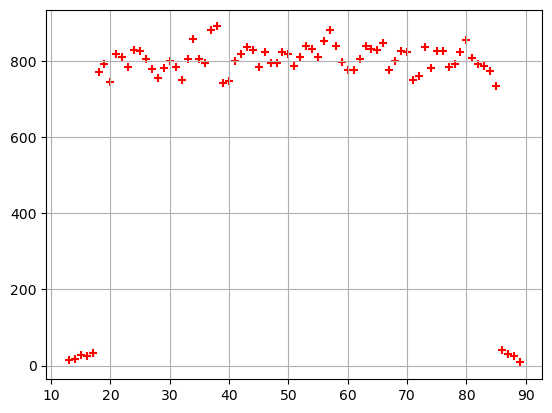

In [164]:
plt.figure()
plt.scatter(dfAgeCount["Age"], dfAgeCount["Treatment_Count"], c='red', marker='+')
plt.grid()
plt.show()

#### By Age_Bracket 

In [166]:
df2_Age_Bracket = dimMeasAnalysis(df2, 'Age_Bracket', "Age", cols = ['min', 'max', 'count'])
df2_Age_Bracket['Treatment_Count_Pct'] = (df2_Age_Bracket['Age_Count'] / df2_Age_Bracket['Age_Count'].sum()) * 100
df2_Age_Bracket = df2_Age_Bracket.rename(columns = {
    'Age_Min' : 'Age_Bracket_Min',
    'Age_Max' : 'Age_Bracket_Max',
    'Age_Count' : 'Treatment_Count'
})
df2_Age_Bracket

,Age_Bracket,Age_Bracket_Min,Age_Bracket_Max,Treatment_Count,Treatment_Count_Pct
0,1,13,20,2421,4.40
1,2,21,28,6403,11.65
2,3,29,35,5581,10.15
3,4,36,43,6505,11.83
4,5,44,51,6448,11.73
5,6,52,58,5862,10.66
6,7,59,66,6497,11.82
7,8,67,73,5568,10.13
8,9,74,81,6494,11.81
9,10,82,89,3187,5.80


In [167]:
#Minumum Vs Maximum Treatment
pd.concat([df2_Age_Bracket[df2_Age_Bracket['Treatment_Count'] == df2_Age_Bracket['Treatment_Count'].min()], df2_Age_Bracket[df2_Age_Bracket['Treatment_Count'] == df2_Age_Bracket['Treatment_Count'].max()]])

,Age_Bracket,Age_Bracket_Min,Age_Bracket_Max,Treatment_Count,Treatment_Count_Pct
0,1,13,20,2421,4.40
3,4,36,43,6505,11.83


##### Visualization

In [168]:
np.random.shuffle(color_palette_50)

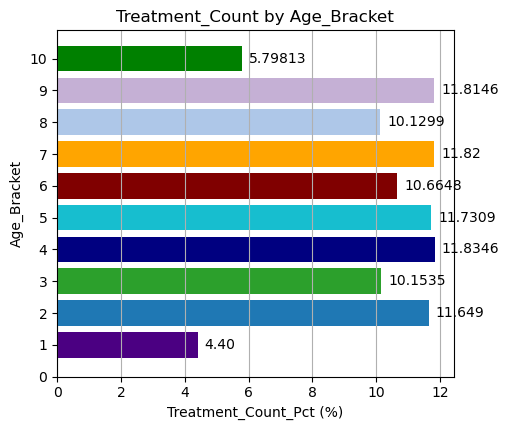

In [169]:
plt.figure(figsize = (5,4))
bar = plt.barh(df2_Age_Bracket['Age_Bracket'], df2_Age_Bracket['Treatment_Count_Pct'], color = color_palette_50)
plt.bar_label(bar, ["{:.2f}".format(df2_Age_Bracket['Treatment_Count_Pct'].values[0])], rotation='horizontal', padding = 5)
plt.yticks(np.arange(len(df2_Age_Bracket['Age_Bracket']) + 1))
plt.tight_layout()
plt.grid(axis = "x")
plt.title("Treatment_Count by Age_Bracket")
plt.xlabel("Treatment_Count_Pct (%)")
plt.ylabel("Age_Bracket")
plt.show()

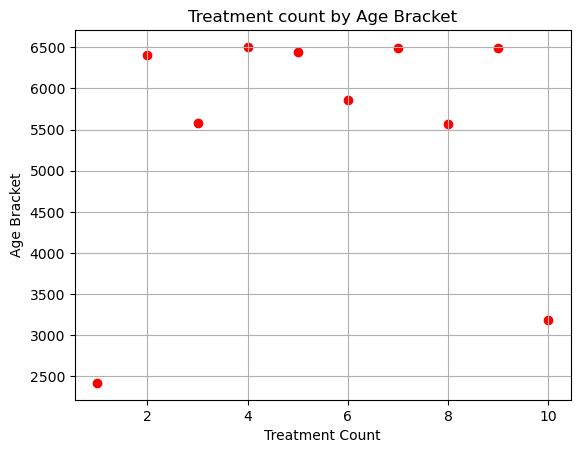

In [172]:
plt.figure()
plt.scatter(df2_Age_Bracket["Age_Bracket"], df2_Age_Bracket["Treatment_Count"], c='red', marker='o')
plt.title("Treatment count by Age Bracket")
plt.xlabel("Treatment Count")
plt.ylabel("Age Bracket")
plt.grid()
plt.show()

#### By Gender

In [173]:
#Gender Count
dfGenderCount = df2.groupby(['Gender'])['Name'].count().reset_index()
dfGenderCount['Treatment_Count_Pct'] = (dfGenderCount['Name'] / dfGenderCount['Name'].sum()) * 100
dfGenderCount = dfGenderCount.rename(columns = {
    'Name' : 'Treatment_Count'
})
dfGenderCount

,Gender,Treatment_Count,Treatment_Count_Pct
0,Female,27470,49.98
1,Male,27496,50.02


##### Visualization

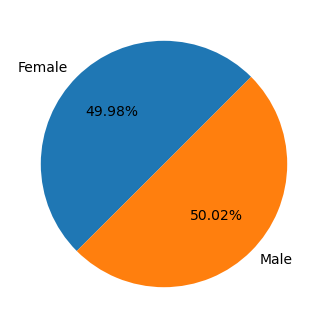

In [175]:
plt.figure(figsize = (4,4))
plt.pie(dfGenderCount['Treatment_Count_Pct'], labels = dfGenderCount['Gender'], autopct = '%1.2f%%', startangle = 45)
plt.show()

#### By Medical_Condition

In [177]:
# Medical_Condition Count
df_Medical_Condition_Count = df2.groupby(['Medical_Condition'])['Name'].count().reset_index()
df_Medical_Condition_Count['Treatment_Count_Pct'] = (df_Medical_Condition_Count['Name'] / treatmentCount) * 100
df_Medical_Condition_Count = df_Medical_Condition_Count.rename(columns = {
    'Name' : 'Treatment_Count'
})
df_Medical_Condition_Count

,Medical_Condition,Treatment_Count,Treatment_Count_Pct
0,Arthritis,9218,16.77
1,Asthma,9095,16.55
2,Cancer,9140,16.63
3,Diabetes,9216,16.77
4,Hypertension,9151,16.65
5,Obesity,9146,16.64


##### Visualization

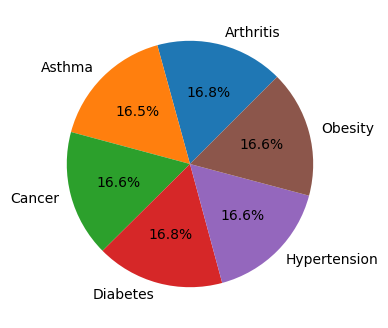

In [179]:
plt.figure(figsize = (4,4))
plt.pie(df_Medical_Condition_Count['Treatment_Count_Pct'], labels = df_Medical_Condition_Count['Medical_Condition'], autopct = '%1.1f%%', startangle = 45)
plt.show()

In [180]:
np.random.shuffle(color_palette_50)

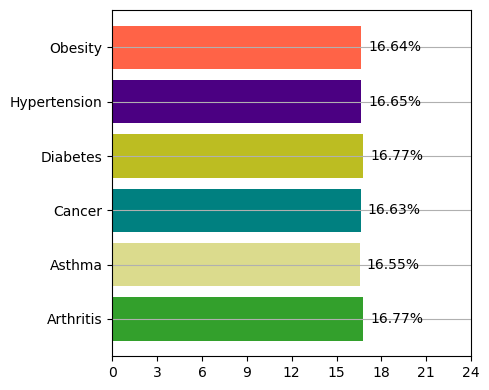

In [184]:
plt.figure(figsize = (5,4))
bar = plt.barh(df_Medical_Condition_Count['Medical_Condition'], df_Medical_Condition_Count['Treatment_Count_Pct'], color = color_palette_50)
plt.bar_label(bar, ["{:.2f}%".format(x) for x in df_Medical_Condition_Count['Treatment_Count_Pct']], rotation = "horizontal", padding = 5)
plt.yticks(rotation = "horizontal")
plt.xticks(np.arange(0, 25, step = 3))
plt.tight_layout()
plt.grid(axis = "y")
plt.show()

#### By blood type

In [185]:
# Blood_Type Count
df_Blood_Type_Count = df2.groupby(['Blood_Type'])['Name'].count().reset_index()
df_Blood_Type_Count['Treatment_Count_Pct'] = (df_Blood_Type_Count['Name'] / df_Blood_Type_Count['Name'].sum()) * 100
df_Blood_Type_Count = df_Blood_Type_Count.rename(columns = {
    'Name' : 'Treatment_Count'
})
df_Blood_Type_Count

,Blood_Type,Treatment_Count,Treatment_Count_Pct
0,A+,6896,12.55
1,A-,6898,12.55
2,AB+,6882,12.52
3,AB-,6874,12.51
4,B+,6885,12.53
5,B-,6872,12.50
6,O+,6855,12.47
7,O-,6804,12.38


##### Visualization

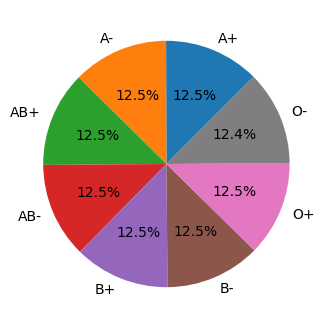

In [186]:
plt.figure(figsize = (4,4))
plt.pie(df_Blood_Type_Count['Treatment_Count_Pct'], labels = df_Blood_Type_Count['Blood_Type'], autopct = '%1.1f%%', startangle = 45)
plt.show()

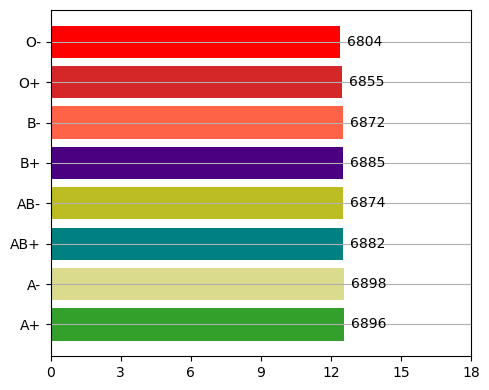

In [187]:
plt.figure(figsize = (5,4))
bar = plt.barh(df_Blood_Type_Count['Blood_Type'], df_Blood_Type_Count['Treatment_Count_Pct'], color = color_palette_50)
plt.bar_label(bar, ["{}".format(x) for x in df_Blood_Type_Count['Treatment_Count']], rotation = "horizontal", padding = 5)
plt.yticks(rotation = "horizontal")
plt.xticks(np.arange(0, 20, step = 3))
plt.tight_layout()
plt.grid(axis = "y")
plt.show()

#### By Medication

In [188]:
# Medication Count
df_Medication_Count = df2.groupby(['Medication'])['Name'].count().reset_index()
df_Medication_Count['Treatment_Count_Pct'] = (df_Medication_Count['Name'] / df_Medication_Count['Name'].sum()) * 100
df_Medication_Count = df_Medication_Count.rename(columns = {
    'Name' : 'Treatment_Count'
})
df_Medication_Count

,Medication,Treatment_Count,Treatment_Count_Pct
0,Aspirin,10984,19.98
1,Ibuprofen,11023,20.05
2,Lipitor,11038,20.08
3,Paracetamol,10965,19.95
4,Penicillin,10956,19.93


##### Visualization

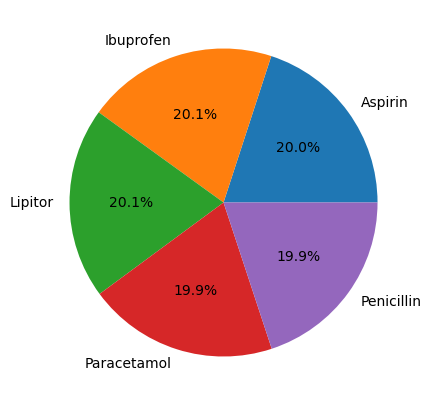

In [189]:
plt.figure(figsize = (5,5))
plt.pie(df_Medication_Count['Treatment_Count_Pct'], labels = df_Medication_Count['Medication'], autopct = "%1.1f%%")
plt.show()

#### By Doctor

In [190]:
#Doctor Count
df_PatientCount_Doctor = df2.groupby(['Doctor'])['Name'].count().reset_index()
df_PatientCount_Doctor = df_PatientCount_Doctor.rename(columns = {
    'Name' : 'Treatment_Count'
})
df_PatientCount_Doctor

,Doctor,Treatment_Count
0,Aaron Acevedo,1
1,Aaron Adams,1
2,Aaron Aguilar,1
3,Aaron Alexander,1
4,Aaron Anderson,1
...,...,...
40336,Zoe Khan,1
40337,Zoe Knight,1
40338,Zoe Nichols,1
40339,Zoe Roberts,1


#### By Hospital

In [191]:
#Hospital Count
df_PatientCount_Hospital = df2.groupby(['Hospital'])['Name'].count().reset_index()
df_PatientCount_Hospital = df_PatientCount_Hospital.rename(columns = {
    'Name' : 'Treatment_Count'
})
df_PatientCount_Hospital

,Hospital,Treatment_Count
0,Abbott Inc,1
1,Abbott Ltd,1
2,"Abbott Moore and Williams,",1
3,"Abbott and Thompson, Sullivan",1
4,"Abbott, Peters and Hoffman",2
...,...,...
39871,and Zimmerman Sons,1
39872,"and Zuniga Davis Carlson,",1
39873,"and Zuniga Francis Peterson,",1
39874,and Zuniga Sons,1


#### By Insurance_Provider

In [192]:
#Insurance_Provider Count
df_PatientCount_Insurance_Provider = df2.groupby(['Insurance_Provider'])['Name'].count().reset_index()
df_PatientCount_Insurance_Provider = df_PatientCount_Insurance_Provider.rename(columns = {
    'Name' : 'Treatment_Count'
})
df_PatientCount_Insurance_Provider

,Insurance_Provider,Treatment_Count
0,Aetna,10822
1,Blue Cross,10952
2,Cigna,11139
3,Medicare,11039
4,UnitedHealthcare,11014


#### By Admission_Type

In [193]:
#Admission_Type Count
df_PatientCount_Admission_Type = df2.groupby(['Admission_Type'])['Name'].count().reset_index()
df_PatientCount_Admission_Type = df_PatientCount_Admission_Type.rename(columns = {
    'Name' : 'Treatment_Count'
})
df_PatientCount_Admission_Type

,Admission_Type,Treatment_Count
0,Elective,18473
1,Emergency,18102
2,Urgent,18391


### Medical Condition

In [200]:
#Medical_Condition
print("Medical Conditions:", Medical_Conditions)

Medical Conditions: ['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']


In [241]:
def plotMedicalConditionChart2(dfr, plotby, filterby = False, titles = [], areaplot = False):
    map_offset = 0.5
    for iMedical_Condition in dfr['Medical_Condition'].unique():
        thisDf = dfr[dfr['Medical_Condition'] == iMedical_Condition]
        #Filter Medical_Condition 
        if (filterby) :
            if isinstance(filterby, str):
                if (iMedical_Condition == filterby) :
                    plt.plot(thisDf[plotby[0]], thisDf[plotby[1]], marker = "o", label = iMedical_Condition)
                    if (areaplot != False):
                        plt.fill_between(thisDf[plotby[0]], dfr[plotby[1]].min() - map_offset, thisDf[plotby[1]], alpha=areaplot) 
            elif isinstance(filterby, list):
                if (iMedical_Condition in filterby) :
                    plt.plot(thisDf[plotby[0]], thisDf[plotby[1]], marker = "o", label = iMedical_Condition)
                    if (areaplot != False):
                        plt.fill_between(thisDf[plotby[0]], dfr[plotby[1]].min() - map_offset, thisDf[plotby[1]], alpha=areaplot) 
        else:
        
            plt.plot(thisDf[plotby[0]], thisDf[plotby[1]], marker = "o", label = iMedical_Condition)
            if (areaplot != False):
                plt.fill_between(thisDf[plotby[0]], dfr[plotby[1]].min() - map_offset, thisDf[plotby[1]], alpha=areaplot) 

        
    plt.legend()
    plt.grid()
    if (titles[0]): 
        plt.title(titles[0])
    if (titles[1]):
        plt.xlabel(titles[1])
    if (titles[2]):
        plt.ylabel(titles[2])
    plt.show()

#### By Medication

In [202]:
df_MC_Meds = df2.groupby(['Medical_Condition', 'Medication'])['Name'].count().reset_index()
df_MC_Meds = df_MC_Meds.rename(columns = {
    'Name' : 'Treatment_Count'
})
df_MC_Meds['Treatment_Count_Total'] = df_MC_Meds.groupby(['Medical_Condition'])['Treatment_Count'].transform('sum')
df_MC_Meds['Treatment_Count_Pct'] = (df_MC_Meds['Treatment_Count'] / df_MC_Meds['Treatment_Count_Total']) * 100

df_MC_Meds

,Medical_Condition,Medication,Treatment_Count,Treatment_Count_Total,Treatment_Count_Pct
0,Arthritis,Aspirin,1901,9218,20.62
1,Arthritis,Ibuprofen,1805,9218,19.58
2,Arthritis,Lipitor,1810,9218,19.64
3,Arthritis,Paracetamol,1858,9218,20.16
4,Arthritis,Penicillin,1844,9218,20.00
5,Asthma,Aspirin,1781,9095,19.58
6,Asthma,Ibuprofen,1802,9095,19.81
7,Asthma,Lipitor,1814,9095,19.95
8,Asthma,Paracetamol,1870,9095,20.56
9,Asthma,Penicillin,1828,9095,20.10


##### Visualization

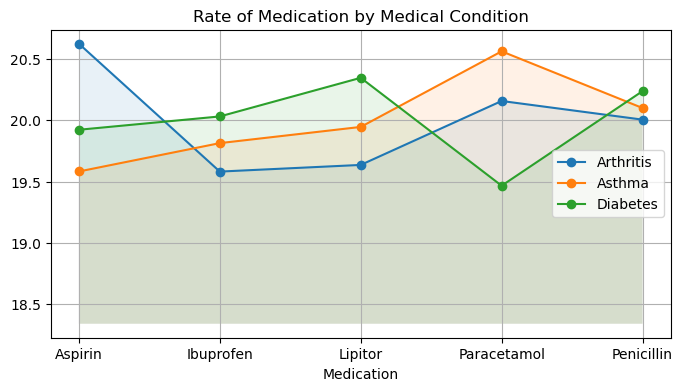

In [237]:
# filterby - False for all, "Asthma" string for one, ["Arthritis", "Asthma", "Diabetes"] list for selection
filterby = ["Arthritis", "Asthma", "Diabetes"] 

plotby = ["Medication", "Treatment_Count_Pct"]
chart_title = "Rate of Medication by Medical Condition"
x_label = "Medication"
y_label = False
plt.figure(figsize = (8,4))
plotMedicalConditionChart2(df_MC_Meds, plotby, filterby, [chart_title, x_label, y_label], areaplot = 0.1)

#### By Blood Type

In [238]:
# Medical_Condition by Blood_Type
df_MC_BT = df2.groupby(['Medical_Condition', 'Blood_Type'])['Name'].count().reset_index()
df_MC_BT = df_MC_BT.rename(columns = {
    'Name' : 'Treatment_Count'
})
df_MC_BT['Treatment_Count_Total'] = df_MC_BT.groupby(['Medical_Condition'])['Treatment_Count'].transform('sum')
df_MC_BT['Treatment_Count_Pct'] = (df_MC_BT['Treatment_Count'] / df_MC_BT.groupby(['Medical_Condition'])['Treatment_Count'].transform('sum')) * 100

df_MC_BT

,Medical_Condition,Blood_Type,Treatment_Count,Treatment_Count_Total,Treatment_Count_Pct
0,Arthritis,A+,1107,9218,12.01
1,Arthritis,A-,1144,9218,12.41
2,Arthritis,AB+,1124,9218,12.19
3,Arthritis,AB-,1179,9218,12.79
4,Arthritis,B+,1191,9218,12.92
5,Arthritis,B-,1152,9218,12.50
6,Arthritis,O+,1186,9218,12.87
7,Arthritis,O-,1135,9218,12.31
8,Asthma,A+,1124,9095,12.36
9,Asthma,A-,1162,9095,12.78


##### Visualization

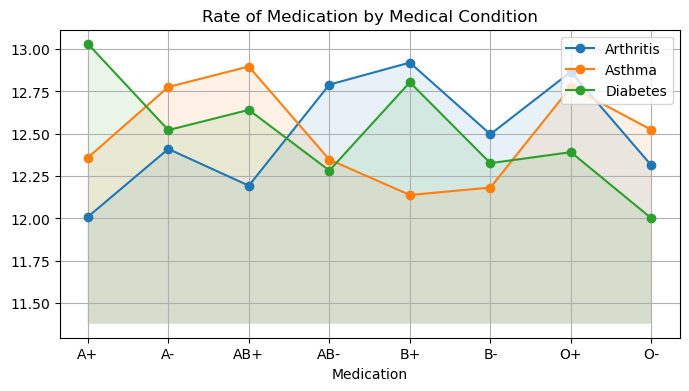

In [242]:
# filterby - False for all, "Asthma" string for one, ["Arthritis", "Asthma", "Diabetes"] list for selection
filterby = ["Arthritis", "Asthma", "Diabetes"] 

plotby = ["Blood_Type", "Treatment_Count_Pct"]
chart_title = "Rate of Medication by Medical Condition"
x_label = "Medication"
y_label = False
plt.figure(figsize = (8,4))
plotMedicalConditionChart2(df_MC_BT, plotby, filterby, [chart_title, x_label, y_label], areaplot = 0.1)

#### By Billing Amount

In [243]:
# Medical_Condition by Billing_Amount
df_MC_BA = df2.groupby(['Medical_Condition'])['Billing_Amount'].sum().reset_index()
df_MC_BA['Billing_Amount_Pct'] = (df_MC_BA['Billing_Amount'] / df_MC_BA['Billing_Amount'].sum()) * 100
df_MC_BA

,Medical_Condition,Billing_Amount,Billing_Amount_Pct
0,Arthritis,235167617.96,16.75
1,Asthma,233136334.13,16.60
2,Cancer,229892231.73,16.37
3,Diabetes,236486971.10,16.84
4,Hypertension,233378490.35,16.62
5,Obesity,236006693.95,16.81


##### Visualization

In [245]:
np.random.shuffle(color_palette_50)

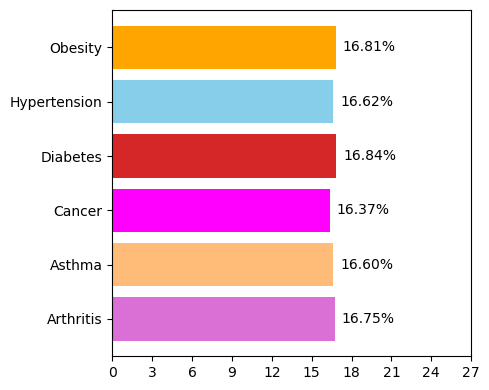

In [246]:
plt.figure(figsize = (5,4))
bar = plt.barh(df_MC_BA['Medical_Condition'], df_MC_BA['Billing_Amount_Pct'], color = color_palette_50)
plt.bar_label(bar, ["{:.2f}%".format(x) for x in df_MC_BA['Billing_Amount_Pct']], rotation = "horizontal", padding = 5)
plt.yticks(rotation = "horizontal")
plt.xticks(np.arange(0, 30, step = 3))
plt.tight_layout()
plt.show()

#### By Age

In [248]:
# Medical_Condition by Age
df_MC_A = df2.groupby(['Medical_Condition', 'Age'])['Name'].count().reset_index()
df_MC_A = df_MC_A.rename(columns = {
    'Name' : 'Treatment_Count'
})
df_MC_A['Treatment_Count_Total'] = df_MC_A.groupby(['Medical_Condition'])['Treatment_Count'].transform('sum')
df_MC_A['Treatment_Count_Pct'] = (df_MC_A['Treatment_Count'] / df_MC_A.groupby(['Medical_Condition'])['Treatment_Count'].transform('sum')) * 100
df_MC_A = df_MC_A[['Medical_Condition', 'Age', 'Treatment_Count', 'Treatment_Count_Pct']]

df_MC_A

,Medical_Condition,Age,Treatment_Count,Treatment_Count_Pct
0,Arthritis,13,2,0.02
1,Arthritis,14,4,0.04
2,Arthritis,15,2,0.02
3,Arthritis,16,3,0.03
4,Arthritis,17,10,0.11
5,Arthritis,18,128,1.39
6,Arthritis,19,147,1.59
7,Arthritis,20,130,1.41
8,Arthritis,21,128,1.39
9,Arthritis,22,133,1.44


#### By Age Bracket

In [250]:
# Medical_Condition by Age_Bracket
df_MC_AB = df2.groupby(['Medical_Condition', 'Age_Bracket'], observed = False)['Name'].count().reset_index()
df_MC_AB = df_MC_AB.rename(columns = {
    'Name' : 'Treatment_Count'
})
df_MC_AB['Treatment_Count_Total'] = df_MC_AB.groupby(['Medical_Condition'])['Treatment_Count'].transform('sum')
df_MC_AB['Treatment_Count_Pct'] = (df_MC_AB['Treatment_Count'] / df_MC_AB['Treatment_Count_Total']) * 100
df_MC_AB = df_MC_AB[['Medical_Condition', 'Age_Bracket', 'Treatment_Count', 'Treatment_Count_Pct']]

df_MC_AB

,Medical_Condition,Age_Bracket,Treatment_Count,Treatment_Count_Pct
0,Arthritis,1,426,4.62
1,Arthritis,2,1037,11.25
2,Arthritis,3,948,10.28
3,Arthritis,4,1115,12.10
4,Arthritis,5,1086,11.78
5,Arthritis,6,982,10.65
6,Arthritis,7,1034,11.22
7,Arthritis,8,940,10.20
8,Arthritis,9,1121,12.16
9,Arthritis,10,529,5.74


##### Visualization

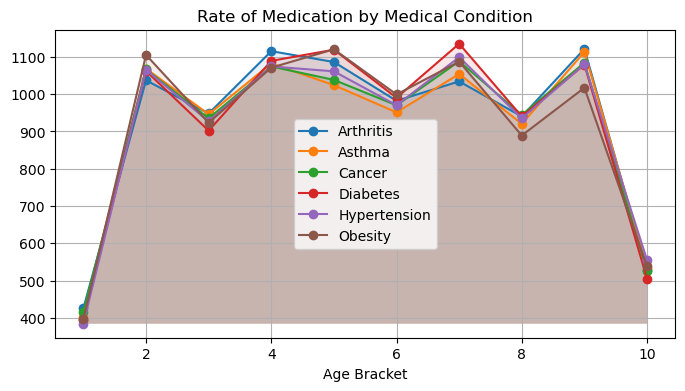

In [252]:
filterby = False
plotby = ["Age_Bracket", "Treatment_Count"]
chart_title = "Rate of Medication by Medical Condition"
x_label = "Age Bracket"
y_label = False
plt.figure(figsize = (8,4))
plotMedicalConditionChart2(df_MC_AB, plotby, filterby, [chart_title, x_label, y_label], areaplot = 0.1)

### Billing Amount

In [253]:
def billingAmountAnalysis(column_name):
    return dimMeasAnalysis(df2, column_name, "Billing_Amount" , cols = ['count', 'min', 'avg', 'max', 'sum'])

#### By Doctor

In [254]:
df_BA_D = billingAmountAnalysis('Doctor')
df_BA_D

,Doctor,Billing_Amount_Count,Billing_Amount_Min,Billing_Amount_Avg,Billing_Amount_Max,Billing_Amount_Total
0,Aaron Acevedo,1,29047.28,29047.28,29047.28,29047.28
1,Aaron Adams,1,20162.26,20162.26,20162.26,20162.26
2,Aaron Aguilar,1,8091.81,8091.81,8091.81,8091.81
3,Aaron Alexander,1,22120.87,22120.87,22120.87,22120.87
4,Aaron Anderson,1,40326.06,40326.06,40326.06,40326.06
...,...,...,...,...,...,...
40336,Zoe Khan,1,25569.20,25569.20,25569.20,25569.20
40337,Zoe Knight,1,33601.00,33601.00,33601.00,33601.00
40338,Zoe Nichols,1,34217.90,34217.90,34217.90,34217.90
40339,Zoe Roberts,1,38594.42,38594.42,38594.42,38594.42


#### By Hospital

In [255]:
df_BA_H = billingAmountAnalysis('Hospital')
df_BA_H

,Hospital,Billing_Amount_Count,Billing_Amount_Min,Billing_Amount_Avg,Billing_Amount_Max,Billing_Amount_Total
0,Abbott Inc,1,38052.04,38052.04,38052.04,38052.04
1,Abbott Ltd,1,29877.59,29877.59,29877.59,29877.59
2,"Abbott Moore and Williams,",1,24799.60,24799.60,24799.60,24799.60
3,"Abbott and Thompson, Sullivan",1,16738.57,16738.57,16738.57,16738.57
4,"Abbott, Peters and Hoffman",2,18842.40,18842.40,18842.40,37684.79
...,...,...,...,...,...,...
39871,and Zimmerman Sons,1,32706.65,32706.65,32706.65,32706.65
39872,"and Zuniga Davis Carlson,",1,42867.04,42867.04,42867.04,42867.04
39873,"and Zuniga Francis Peterson,",1,33689.63,33689.63,33689.63,33689.63
39874,and Zuniga Sons,1,33950.17,33950.17,33950.17,33950.17


#### By Insurance_Provider

In [256]:
df_BA_IP = billingAmountAnalysis('Insurance_Provider')
df_BA_IP

,Insurance_Provider,Billing_Amount_Count,Billing_Amount_Min,Billing_Amount_Avg,Billing_Amount_Max,Billing_Amount_Total
0,Aetna,10822,-2008.49,25549.69,52211.85,276498741.37
1,Blue Cross,10952,-1660.01,25603.46,52764.28,280409100.52
2,Cigna,11139,-1520.42,25526.00,52170.04,284334099.18
3,Medicare,11039,-1277.65,25628.32,52092.67,282911026.77
4,UnitedHealthcare,11014,-1428.84,25414.51,52373.03,279915371.37


#### By Admission_Type

In [257]:
df_BA_AT = billingAmountAnalysis('Admission_Type')
df_BA_AT['Billing_Amount_Pct'] = (df_BA_AT['Billing_Amount_Total'] / df_BA_AT['Billing_Amount_Total'].sum()) * 100
df_BA_AT

,Admission_Type,Billing_Amount_Count,Billing_Amount_Min,Billing_Amount_Avg,Billing_Amount_Max,Billing_Amount_Total,Billing_Amount_Pct
0,Elective,18473,-1660.01,25612.14,52764.28,473133056.18,33.70
1,Emergency,18102,-1316.62,25505.33,52271.66,461697524.20,32.88
2,Urgent,18391,-2008.49,25514.53,52373.03,469237758.85,33.42


##### Visualization

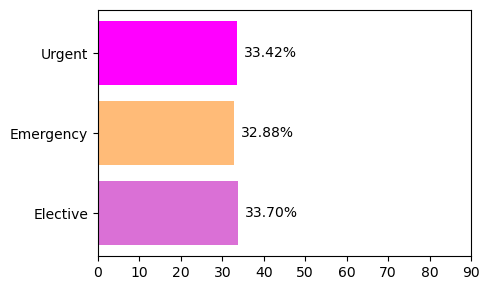

In [258]:
plt.figure(figsize = (5,3))
bar = plt.barh(df_BA_AT['Admission_Type'], df_BA_AT['Billing_Amount_Pct'], color = color_palette_50)
plt.bar_label(bar, ["{:.2f}%".format(x) for x in df_BA_AT['Billing_Amount_Pct']], rotation = "horizontal", padding = 5)
plt.yticks(rotation = "horizontal")
plt.xticks(np.arange(0, 100, step = 10))
plt.tight_layout()
plt.show()

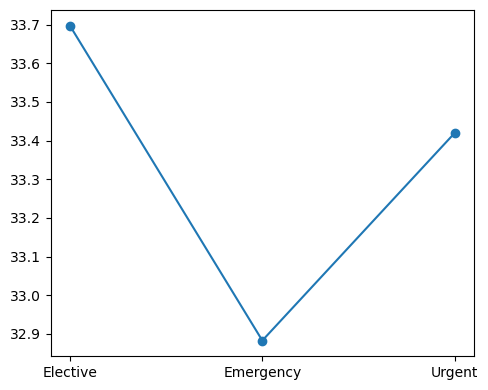

In [259]:
plt.figure(figsize = (5,4))
bar = plt.plot(df_BA_AT['Admission_Type'], df_BA_AT['Billing_Amount_Pct'], marker = "o")
plt.tight_layout()
plt.show()

### Date Analysis

In [264]:
# Days_Of_Admission column
df2['Days_Of_Admission'] = pd.Series(pd.to_datetime(df2['Discharge_Date']) - pd.to_datetime(df2['Date_of_Admission']))
df2 = df2.astype({"Days_Of_Admission" : "string"})
df2 = df2.astype({"Days_Of_Admission" : "object"})
df2['Days_Of_Admission'] = pd.to_numeric(df2['Days_Of_Admission'].str.replace(" days", ""))
df2 = df2.astype({"Days_Of_Admission" : "int64"})

In [265]:
# Year_Of_Admission, Quarter_Of_Admission,  Month_Of_Admission column
df2['Year_Of_Admission'] = df2['Discharge_Date'].dt.year
df2['Quarter_Of_Admission'] = df2['Discharge_Date'].dt.quarter
df2['Month_Of_Admission'] = df2['Discharge_Date'].dt.month

In [266]:
df2.head(4)

,Name,Age,Gender,Blood_Type,Medical_Condition,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results,Age_Bracket,Days_Of_Admission,Year_Of_Admission,Quarter_Of_Admission,Month_Of_Admission
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal,3,2,2024,1,2
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,7,6,2019,3,8
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal,9,15,2022,4,10
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78,450,Elective,2020-12-18,Ibuprofen,Abnormal,2,30,2020,4,12


#### Days_Of_Admission by Medical_Condition

In [601]:
df2_doa_m = dimMeasAnalysis(df2, "Medical_Condition", "Days_Of_Admission", cols = ['min', 'avg', 'max', 'sum'])
df2_doa_m

,Medical_Condition,Days_Of_Admission_Min,Days_Of_Admission_Avg,Days_Of_Admission_Max,Days_Of_Admission_Total
0,Arthritis,1,15.50,30,142918
1,Asthma,1,15.68,30,142585
2,Cancer,1,15.50,30,141681
3,Diabetes,1,15.43,30,142209
4,Hypertension,1,15.44,30,141257
5,Obesity,1,15.45,30,141284


##### Visualization

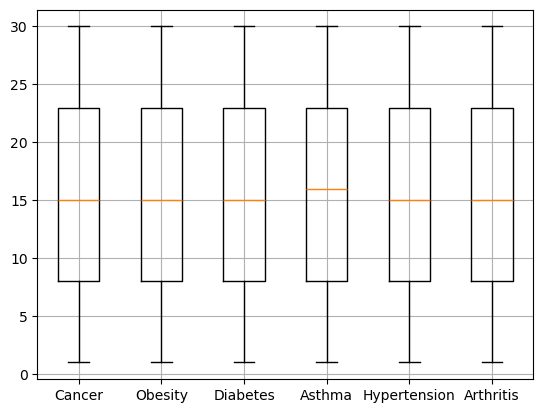

In [508]:
labels = df2['Medical_Condition'].unique()
plots = []
for iMC in labels:
    thisDf = df2[df2['Medical_Condition'] == iMC]['Days_Of_Admission']
    plots.append(thisDf)

plt.figure()
plt.boxplot(plots, tick_labels = labels)
plt.yticks(np.arange(0, 35, step = 5))
plt.grid(True)
plt.show()

#### Year of Admission

In [176]:
df2['Year_Of_Admission'].sort_values(ascending = False).unique()

array([2024, 2023, 2022, 2021, 2020, 2019])

#### Treatment_Count by Year_Of_Admission

In [602]:
df2_yoa1 = df2.groupby(['Year_Of_Admission', 'Quarter_Of_Admission', 'Month_Of_Admission'])['Name'].count().reset_index()
df2_yoa1 = df2_yoa1.rename(columns = {
    "Name" : "Treatment_Count"
})
df2_yoa1

,Year_Of_Admission,Quarter_Of_Admission,Month_Of_Admission,Treatment_Count
0,2019,2,5,273
1,2019,2,6,843
2,2019,3,7,908
3,2019,3,8,953
4,2019,3,9,991
5,2019,4,10,912
6,2019,4,11,1034
7,2019,4,12,924
8,2020,1,1,938
9,2020,1,2,875


##### Visualization

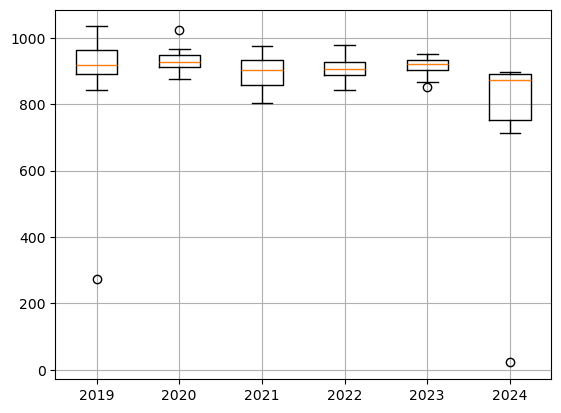

In [620]:
labels = df2_yoa1['Year_Of_Admission'].unique()
plots = []
for iMC in labels:
    thisDf = df2_yoa1[df2_yoa1['Year_Of_Admission'] == iMC]['Treatment_Count']
    plots.append(thisDf)

plt.figure()
plt.boxplot(plots, tick_labels = labels)
#.yticks(np.arange(0, 35, step = 5))
plt.grid(True)
plt.show()

In [552]:
color_palette_62 = [*color_palette_50, *color_palette_50[0:12]]
np.random.shuffle(color_palette_62)

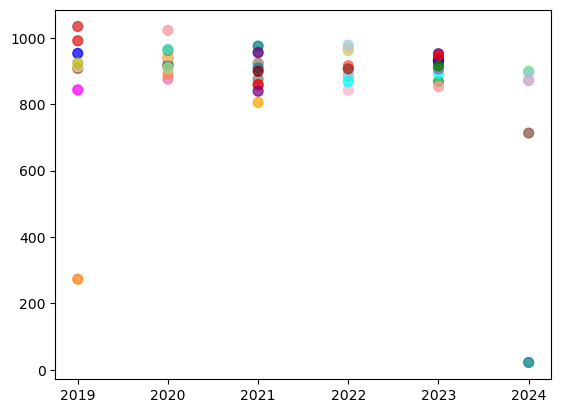

In [622]:
np.random.shuffle(color_palette_50)
plt.figure()
plt.scatter(df2_yoa1["Year_Of_Admission"], df2_yoa1["Treatment_Count"], c=color_palette_62, s = 50, alpha = 0.74, marker='o')
plt.show()

#### Treatment_Count by Quarter_Of_Admission

In [603]:
df2_yoa2 = df2.groupby(['Year_Of_Admission', 'Quarter_Of_Admission'])['Name'].count().reset_index()
df2_yoa2 = df2_yoa2.rename(columns = {
    "Name" : "Treatment_Count"
})
df2_yoa2

,Year_Of_Admission,Quarter_Of_Admission,Treatment_Count
0,2019,2,1116
1,2019,3,2852
2,2019,4,2870
3,2020,1,2724
4,2020,2,2805
5,2020,3,2949
6,2020,4,2714
7,2021,1,2684
8,2021,2,2657
9,2021,3,2783


#### Treatment_Count by Month_Of_Admission

In [604]:
df2_yoa3 = df2.groupby(['Year_Of_Admission', 'Month_Of_Admission'])['Name'].count().reset_index()
df2_yoa3 = df2_yoa3.rename(columns = {
    "Name" : "Treatment_Count"
})
df2_yoa3

,Year_Of_Admission,Month_Of_Admission,Treatment_Count
0,2019,5,273
1,2019,6,843
2,2019,7,908
3,2019,8,953
4,2019,9,991
5,2019,10,912
6,2019,11,1034
7,2019,12,924
8,2020,1,938
9,2020,2,875


#### Treatment_Count by Year_Of_Admission, Medical_Condition

In [605]:
df2_yoa4 = df2.groupby(['Year_Of_Admission', 'Medical_Condition'])['Name'].count().reset_index()
df2_yoa4 = df2_yoa4.rename(columns = {
    "Name" : "Treatment_Count"
})
df2_yoa4

,Year_Of_Admission,Medical_Condition,Treatment_Count
0,2019,Arthritis,1136
1,2019,Asthma,1184
2,2019,Cancer,1190
3,2019,Diabetes,1160
4,2019,Hypertension,1092
5,2019,Obesity,1076
6,2020,Arthritis,1843
7,2020,Asthma,1814
8,2020,Cancer,1899
9,2020,Diabetes,1799


In [207]:
df2_yoa5 = df2.groupby(['Year_Of_Admission', 'Medical_Condition', 'Quarter_Of_Admission'])['Name'].count().reset_index()
df2_yoa5 = df2_yoa5.rename(columns = {
    "Name" : "patient_Count"
})
df2_yoa5

,Year_Of_Admission,Medical_Condition,Quarter_Of_Admission,patient_Count
0,2019,Arthritis,2,175
1,2019,Arthritis,3,494
2,2019,Arthritis,4,467
3,2019,Asthma,2,190
4,2019,Asthma,3,518
5,2019,Asthma,4,476
6,2019,Cancer,2,199
7,2019,Cancer,3,478
8,2019,Cancer,4,513
9,2019,Diabetes,2,176


In [208]:
df2_yoa6 = df2.groupby(['Year_Of_Admission', 'Medical_Condition', 'Month_Of_Admission'])['Name'].count().reset_index()
df2_yoa6 = df2_yoa6.rename(columns = {
    "Name" : "patient_Count"
})
df2_yoa6

,Year_Of_Admission,Medical_Condition,Month_Of_Admission,patient_Count
0,2019,Arthritis,5,40
1,2019,Arthritis,6,135
2,2019,Arthritis,7,152
3,2019,Arthritis,8,163
4,2019,Arthritis,9,179
5,2019,Arthritis,10,145
6,2019,Arthritis,11,172
7,2019,Arthritis,12,150
8,2019,Asthma,5,43
9,2019,Asthma,6,147


#### Billing_Amount by Year_Of_Admission

In [607]:
df2_yoa7 = dimMeasAnalysis(df2, 'Year_Of_Admission', "Billing_Amount")
df2_yoa7 = df2_yoa7.rename(columns = {
    "Billing_Amount_Count" : "Treatment_Count"
})
df2_yoa7

,Year_Of_Admission,Treatment_Count,Billing_Amount_Min,Billing_Amount_Max,Billing_Amount_Avg,Billing_Amount_Total
0,2019,6838,-952.83,52271.66,25743.41,176033449.37
1,2020,11192,-1130.00,52211.85,25360.46,283834244.84
2,2021,10777,-1660.01,52373.03,25682.98,276785514.44
3,2022,10918,-2008.49,52024.73,25538.49,278829284.09
4,2023,10969,-1018.25,52764.28,25541.47,280164385.62
5,2024,4272,-1520.42,51731.66,25379.56,108421460.86


#### Billing_Amount by Month_Of_Admission

In [606]:
df2_yoa8 = dimMeasAnalysis(df2, ['Year_Of_Admission', 'Month_Of_Admission'], "Billing_Amount" )
df2_yoa8 = df2_yoa8.rename(columns = {
    "Billing_Amount_Count" : "Treatment_Count"
})
df2_yoa8

,Year_Of_Admission,Month_Of_Admission,Treatment_Count,Billing_Amount_Min,Billing_Amount_Max,Billing_Amount_Avg,Billing_Amount_Total
0,2019,5,273,-308.58,52102.24,25759.77,7032416.71
1,2019,6,843,-557.01,52154.24,26150.92,22045227.68
2,2019,7,908,-367.20,51848.20,25855.38,23476687.22
3,2019,8,953,-271.72,50995.04,25845.28,24630548.10
4,2019,9,991,-952.83,51015.48,24799.17,24575975.92
5,2019,10,912,-353.87,51198.12,25846.76,23572244.74
6,2019,11,1034,-857.13,52271.66,25798.54,26675686.43
7,2019,12,924,-124.65,51501.65,26000.72,24024662.56
8,2020,1,938,-892.27,50868.91,25163.66,23603513.26
9,2020,2,875,-155.08,51119.45,25316.64,22152059.96


#### Billing_Amount by Quarter_Of_Admission

In [608]:
df2_yoa9 = dimMeasAnalysis(df2, ['Year_Of_Admission', 'Quarter_Of_Admission'], "Billing_Amount" )
df2_yoa9 = df2_yoa8.rename(columns = {
    "Billing_Amount_Count" : "Treatment_Count"
})
df2_yoa9

,Year_Of_Admission,Month_Of_Admission,Treatment_Count,Billing_Amount_Min,Billing_Amount_Max,Billing_Amount_Avg,Billing_Amount_Total
0,2019,5,273,-308.58,52102.24,25759.77,7032416.71
1,2019,6,843,-557.01,52154.24,26150.92,22045227.68
2,2019,7,908,-367.20,51848.20,25855.38,23476687.22
3,2019,8,953,-271.72,50995.04,25845.28,24630548.10
4,2019,9,991,-952.83,51015.48,24799.17,24575975.92
5,2019,10,912,-353.87,51198.12,25846.76,23572244.74
6,2019,11,1034,-857.13,52271.66,25798.54,26675686.43
7,2019,12,924,-124.65,51501.65,26000.72,24024662.56
8,2020,1,938,-892.27,50868.91,25163.66,23603513.26
9,2020,2,875,-155.08,51119.45,25316.64,22152059.96


## Save dataset to file

In [267]:
df2.head()

,Name,Age,Gender,Blood_Type,Medical_Condition,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results,Age_Bracket,Days_Of_Admission,Year_Of_Admission,Quarter_Of_Admission,Month_Of_Admission
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal,3,2,2024,1,2
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,7,6,2019,3,8
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal,9,15,2022,4,10
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78,450,Elective,2020-12-18,Ibuprofen,Abnormal,2,30,2020,4,12
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Penicillin,Abnormal,4,20,2022,4,10


In [268]:
df2.to_csv("dataset_clean.csv", index = False)